# About

In this programming assignment you will train a classifier to identify type of a particle. There are six particle types: electron, proton, muon, kaon, pion and ghost. Ghost is a particle with other type than the first five or a detector noise. 

Different particle types remain different responses in the detector systems or subdetectors. Thre are five systems: tracking system, ring imaging Cherenkov detector (RICH), electromagnetic and hadron calorimeters, and muon system.

![pid](pic/pid.jpg)

You task is to identify a particle type using the responses in the detector systems. 

# Attention

Data files you should download from https://github.com/hse-aml/hadron-collider-machine-learning/releases/tag/Week_2

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas
import numpy
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
import utils

# Download data

Download data used to train classifiers.

### Read training file

In [2]:
data = pandas.read_csv('training.csv.gz')

In [3]:
data.head()

,TrackP,TrackNDoFSubdetector2,BremDLLbeElectron,MuonLooseFlag,FlagSpd,SpdE,EcalDLLbeElectron,DLLmuon,RICHpFlagElectron,EcalDLLbeMuon,...,TrackNDoF,RICHpFlagMuon,RICH_DLLbeKaon,RICH_DLLbeElectron,HcalE,MuonFlag,FlagMuon,PrsE,RICH_DLLbeMuon,RICH_DLLbeProton
0,74791.156263,15.0,0.232275,1.0,1.0,3.2,-2.505719,6.604153,1.0,1.929960,...,28.0,1.0,-7.213300,-0.280200,5586.589846,1.0,1.0,10.422315,-2.081143e-07,-24.824400
1,2738.489989,15.0,-0.357748,0.0,1.0,3.2,1.864351,0.263651,1.0,-2.061959,...,32.0,1.0,-0.324317,1.707283,-0.000007,0.0,1.0,43.334935,2.771583e+00,-0.648017
2,2161.409908,17.0,-999.000000,0.0,0.0,-999.0,-999.000000,-999.000000,0.0,-999.000000,...,27.0,0.0,-999.000000,-999.000000,-999.000000,0.0,0.0,-999.000000,-9.990000e+02,-999.000000
3,15277.730490,20.0,-0.638984,0.0,1.0,3.2,-2.533918,-8.724949,1.0,-3.253981,...,36.0,1.0,-35.202221,-14.742319,4482.803707,0.0,1.0,2.194175,-3.070819e+00,-29.291519
4,7563.700195,19.0,-0.638962,0.0,1.0,3.2,-2.087146,-7.060422,1.0,-0.995816,...,33.0,1.0,25.084287,-10.272412,5107.554680,0.0,1.0,0.000015,-5.373712e+00,23.653087


In [4]:
data.describe()

,TrackP,TrackNDoFSubdetector2,BremDLLbeElectron,MuonLooseFlag,FlagSpd,SpdE,EcalDLLbeElectron,DLLmuon,RICHpFlagElectron,EcalDLLbeMuon,...,TrackNDoF,RICHpFlagMuon,RICH_DLLbeKaon,RICH_DLLbeElectron,HcalE,MuonFlag,FlagMuon,PrsE,RICH_DLLbeMuon,RICH_DLLbeProton
count,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,...,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06
mean,1.614162e+04,1.475170e+01,-2.077315e+02,1.908400e-01,8.531908e-01,-1.443849e+02,-1.828275e+02,-1.266902e+01,9.514050e-01,-1.830022e+02,...,2.942221e+01,9.187425e-01,-5.183805e+01,-5.103860e+01,2.900030e+03,1.662333e-01,8.209933e-01,-1.338948e+02,-4.919965e+01,-5.223401e+01
std,2.790366e+04,4.038073e+00,4.054632e+02,3.929634e-01,3.539157e-01,3.545035e+02,3.854803e+02,1.049158e+02,2.150199e-01,3.853958e+02,...,6.029159e+00,2.732303e-01,2.153209e+02,2.150846e+02,7.686446e+03,3.722901e-01,3.833581e-01,3.628977e+02,2.147605e+02,2.152330e+02
min,1.115380e+03,1.000000e+00,-9.990000e+02,0.000000e+00,0.000000e+00,-9.990000e+02,-9.990000e+02,-9.990000e+02,0.000000e+00,-9.990000e+02,...,7.000000e+00,0.000000e+00,-9.990000e+02,-9.990000e+02,-9.990000e+02,0.000000e+00,0.000000e+00,-9.990000e+02,-9.990000e+02,-9.990000e+02
25%,4.137650e+03,1.300000e+01,-6.389485e-01,0.000000e+00,1.000000e+00,0.000000e+00,-3.000639e+00,-5.711142e+00,1.000000e+00,-3.367626e+00,...,2.600000e+01,1.000000e+00,-1.469941e+01,-1.310509e+01,-1.438680e-05,0.000000e+00,1.000000e+00,9.222748e-06,-4.503331e+00,-1.619484e+01
50%,8.069835e+03,1.600000e+01,-5.329026e-01,0.000000e+00,1.000000e+00,3.200000e+00,-2.321410e+00,-1.988139e+00,1.000000e+00,-1.956064e+00,...,3.000000e+01,1.000000e+00,-1.207258e-06,-2.356098e+00,5.780127e+02,0.000000e+00,1.000000e+00,2.468449e+00,-4.697510e-01,-2.928758e-06
75%,1.750157e+04,1.800000e+01,-5.933819e-02,0.000000e+00,1.000000e+00,3.200000e+00,5.918621e-01,1.669210e+00,1.000000e+00,4.339380e-01,...,3.400000e+01,1.000000e+00,8.465107e+00,1.674137e+00,3.046122e+03,0.000000e+00,1.000000e+00,8.502449e+00,1.300086e+00,8.922095e+00
max,4.750951e+06,3.000000e+01,4.791513e+00,1.000000e+00,1.000000e+00,3.200000e+00,4.341298e+00,1.471079e+01,1.000000e+00,2.153017e+00,...,5.200000e+01,1.000000e+00,1.588015e+02,1.861542e+02,8.682200e+05,1.000000e+00,1.000000e+00,2.805800e+02,1.428335e+02,1.462984e+02


### List of columns in the samples

Here, **Spd** stands for Scintillating Pad Detector, **Prs** - Preshower, **Ecal** - electromagnetic calorimeter, **Hcal** - hadronic calorimeter, **Brem** denotes traces of the particles that were deflected by detector.

- ID - id value for tracks (presents only in the test file for the submitting purposes)
- Label - string valued observable denoting particle types. Can take values "Electron", "Muon", "Kaon", "Proton", "Pion" and "Ghost". This column is absent in the test file.
- FlagSpd - flag (0 or 1), if reconstructed track passes through Spd
- FlagPrs - flag (0 or 1), if reconstructed track passes through Prs
- FlagBrem - flag (0 or 1), if reconstructed track passes through Brem
- FlagEcal - flag (0 or 1), if reconstructed track passes through Ecal
- FlagHcal - flag (0 or 1), if reconstructed track passes through Hcal
- FlagRICH1 - flag (0 or 1), if reconstructed track passes through the first RICH detector
- FlagRICH2 - flag (0 or 1), if reconstructed track passes through the second RICH detector
- FlagMuon - flag (0 or 1), if reconstructed track passes through muon stations (Muon)
- SpdE - energy deposit associated to the track in the Spd
- PrsE - energy deposit associated to the track in the Prs
- EcalE - energy deposit associated to the track in the Hcal
- HcalE - energy deposit associated to the track in the Hcal
- PrsDLLbeElectron - delta log-likelihood for a particle candidate to be electron using information from Prs
- BremDLLbeElectron - delta log-likelihood for a particle candidate to be electron using information from Brem
- TrackP - particle momentum
- TrackPt - particle transverse momentum
- TrackNDoFSubdetector1  - number of degrees of freedom for track fit using hits in the tracking sub-detector1
- TrackQualitySubdetector1 - chi2 quality of the track fit using hits in the tracking sub-detector1
- TrackNDoFSubdetector2 - number of degrees of freedom for track fit using hits in the tracking sub-detector2
- TrackQualitySubdetector2 - chi2 quality of the track fit using hits in the  tracking sub-detector2
- TrackNDoF - number of degrees of freedom for track fit using hits in all tracking sub-detectors
- TrackQualityPerNDoF - chi2 quality of the track fit per degree of freedom
- TrackDistanceToZ - distance between track and z-axis (beam axis)
- Calo2dFitQuality - quality of the 2d fit of the clusters in the calorimeter 
- Calo3dFitQuality - quality of the 3d fit in the calorimeter with assumption that particle was electron
- EcalDLLbeElectron - delta log-likelihood for a particle candidate to be electron using information from Ecal
- EcalDLLbeMuon - delta log-likelihood for a particle candidate to be muon using information from Ecal
- EcalShowerLongitudinalParameter - longitudinal parameter of Ecal shower
- HcalDLLbeElectron - delta log-likelihood for a particle candidate to be electron using information from Hcal
- HcalDLLbeMuon - delta log-likelihood for a particle candidate to be using information from Hcal
- RICHpFlagElectron - flag (0 or 1) if momentum is greater than threshold for electrons to produce Cherenkov light
- RICHpFlagProton - flag (0 or 1) if momentum is greater than threshold for protons to produce Cherenkov light
- RICHpFlagPion - flag (0 or 1) if momentum is greater than threshold for pions to produce Cherenkov light
- RICHpFlagKaon - flag (0 or 1) if momentum is greater than threshold for kaons to produce Cherenkov light
- RICHpFlagMuon - flag (0 or 1) if momentum is greater than threshold for muons to produce Cherenkov light
- RICH_DLLbeBCK  - delta log-likelihood for a particle candidate to be background using information from RICH
- RICH_DLLbeKaon - delta log-likelihood for a particle candidate to be kaon using information from RICH
- RICH_DLLbeElectron - delta log-likelihood for a particle candidate to be electron using information from RICH
- RICH_DLLbeMuon - delta log-likelihood for a particle candidate to be muon using information from RICH
- RICH_DLLbeProton - delta log-likelihood for a particle candidate to be proton using information from RICH
- MuonFlag - muon flag (is this track muon) which is determined from muon stations
- MuonLooseFlag muon flag (is this track muon) which is determined from muon stations using looser criteria
- MuonLLbeBCK - log-likelihood for a particle candidate to be not muon using information from muon stations
- MuonLLbeMuon - log-likelihood for a particle candidate to be muon using information from muon stations
- DLLelectron - delta log-likelihood for a particle candidate to be electron using information from all subdetectors
- DLLmuon - delta log-likelihood for a particle candidate to be muon using information from all subdetectors
- DLLkaon - delta log-likelihood for a particle candidate to be kaon using information from all subdetectors
- DLLproton - delta log-likelihood for a particle candidate to be proton using information from all subdetectors
- GhostProbability - probability for a particle candidate to be ghost track. This variable is an output of classification model used in the tracking algorithm.

Delta log-likelihood in the features descriptions means the difference between log-likelihood for the mass hypothesis that a given track is left by some particle (for example, electron) and log-likelihood for the mass hypothesis that a given track is left by a pion (so, DLLpion = 0 and thus we don't have these columns). This is done since most tracks (~80%) are left by pions and in practice we actually need to discriminate other particles from pions. In other words, the null hypothesis is that particle is a pion.

### Look at the labels set

The training data contains six classes. Each class corresponds to a particle type. Your task is to predict type of a particle.

In [5]:
set(data.Label)

{'Electron', 'Ghost', 'Kaon', 'Muon', 'Pion', 'Proton'}

Convert the particle types into class numbers.

In [6]:
data['Class'] = utils.get_class_ids(data.Label.values)
set(data.Class)

{0, 1, 2, 3, 4, 5}

### Define training features

The following set of features describe particle responses in the detector systems:

![features](pic/features.jpeg)

Also there are several combined features. The full list is following.

In [7]:
features = list(set(data.columns) - {'Label', 'Class'})
features

['FlagRICH2',
 'EcalDLLbeMuon',
 'FlagEcal',
 'BremDLLbeElectron',
 'RICHpFlagProton',
 'TrackPt',
 'Calo3dFitQuality',
 'PrsE',
 'DLLproton',
 'FlagSpd',
 'TrackNDoF',
 'TrackDistanceToZ',
 'GhostProbability',
 'HcalE',
 'HcalDLLbeMuon',
 'TrackQualityPerNDoF',
 'DLLelectron',
 'DLLkaon',
 'HcalDLLbeElectron',
 'EcalShowerLongitudinalParameter',
 'RICHpFlagPion',
 'DLLmuon',
 'TrackQualitySubdetector2',
 'RICHpFlagMuon',
 'TrackNDoFSubdetector2',
 'SpdE',
 'EcalE',
 'TrackQualitySubdetector1',
 'FlagRICH1',
 'FlagHcal',
 'PrsDLLbeElectron',
 'TrackP',
 'RICH_DLLbeBCK',
 'RICH_DLLbeElectron',
 'FlagBrem',
 'MuonLLbeBCK',
 'RICH_DLLbeMuon',
 'TrackNDoFSubdetector1',
 'FlagPrs',
 'FlagMuon',
 'Calo2dFitQuality',
 'RICH_DLLbeProton',
 'RICHpFlagKaon',
 'MuonLooseFlag',
 'RICH_DLLbeKaon',
 'MuonFlag',
 'RICHpFlagElectron',
 'MuonLLbeMuon',
 'EcalDLLbeElectron']

### Divide training data into 2 parts

In [8]:
training_data, validation_data = train_test_split(data, random_state=11, train_size=0.90)

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2069: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [9]:
len(training_data), len(validation_data)

(1080000, 120000)

# Sklearn classifier

On this step your task is to train **Sklearn** classifier to provide lower **log loss** value.


TASK: your task is to tune the classifier parameters to achieve the lowest **log loss** value on the validation sample you can.

In [56]:
from sklearn.ensemble import GradientBoostingClassifier

In [57]:
%%time 
gb = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100, subsample=0.5, random_state=13,
                                min_samples_leaf=200, max_depth=4)

gb.fit(training_data[features].values[0:10000], training_data.Class.values[0:10000])

CPU times: user 17.9 s, sys: 322 ms, total: 18.2 s
Wall time: 18.4 s


### Log loss on the cross validation sample

In [58]:
# predict each track
proba_gb = gb.predict_proba(validation_data[features].values)

In [59]:
log_loss(validation_data.Class.values, proba_gb)

0.6657036219046549

# Keras neural network

On this step your task is to train **Keras** NN classifier to provide lower **log loss** value.


TASK: your task is to tune the classifier parameters to achieve the lowest **log loss** value on the validation sample you can. Data preprocessing may help you to improve your score.

In [31]:
from keras.layers.core import Dense, Activation
from keras.models import Sequential
from keras.optimizers import Adam
from keras.utils import np_utils
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [28]:
# Standardize features 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
training_scale = scaler.fit_transform(training_data[features].values)
validation_scale = scaler.transform(validation_data[features].values)

In [45]:
def nn_model(input_dim):
    model = Sequential()
    model.add(Dense(256, input_dim=input_dim))
    model.add(Activation('relu'))
    
    model.add(Dense(100))
    model.add(Activation('tanh'))

    model.add(Dense(6))
    model.add(Activation('softmax'))

    model.compile(loss='categorical_crossentropy', optimizer=Adam())
    model.summary()
    return model

In [46]:
# Allow for early stopping if no longer converging
callback = [EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=0, mode='auto'),
            ModelCheckpoint('{val_loss:.4f}.hdf5', monitor='val_loss', verbose=1, save_best_only=True, mode='auto')]

In [47]:
nn = nn_model(len(features))

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 256)               12800     
_________________________________________________________________
activation_28 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_29 (Dense)             (None, 100)               25700     
_________________________________________________________________
activation_29 (Activation)   (None, 100)               0         
_________________________________________________________________
dense_30 (Dense)             (None, 6)                 606       
_________________________________________________________________
activation_30 (Activation)   (None, 6)                 0         
Total params: 39,106
Trainable params: 39,106
Non-trainable params: 0
_________________________________________________

In [48]:
# Do a fit with early stopping and validation scale
nn.fit(training_scale, np_utils.to_categorical(training_data.Class.values),
       validation_data=(validation_scale, np_utils.to_categorical(validation_data.Class.values)),
       epochs=50, verbose=1, batch_size=256, callbacks=callback)

Train on 1080000 samples, validate on 120000 samples
Epoch 1/50
1080000/1080000 [==============================] - 14s 13us/step - loss: 0.6716 - val_loss: 0.6184

Epoch 00001: val_loss improved from inf to 0.61843, saving model to 0.6184.hdf5
Epoch 2/50
1080000/1080000 [==============================] - 13s 12us/step - loss: 0.6095 - val_loss: 0.6024

Epoch 00002: val_loss improved from 0.61843 to 0.60236, saving model to 0.6024.hdf5
Epoch 3/50
1080000/1080000 [==============================] - 14s 13us/step - loss: 0.5962 - val_loss: 0.5920

Epoch 00003: val_loss improved from 0.60236 to 0.59203, saving model to 0.5920.hdf5
Epoch 4/50
1080000/1080000 [==============================] - 14s 13us/step - loss: 0.5890 - val_loss: 0.5883

Epoch 00004: val_loss improved from 0.59203 to 0.58828, saving model to 0.5883.hdf5
Epoch 5/50
1080000/1080000 [==============================] - 13s 12us/step - loss: 0.5837 - val_loss: 0.5813

Epoch 00005: val_loss improved from 0.58828 to 0.58133, savi

### Log loss on the cross validation sample

In [65]:
nn.load_weights('0.5679.hdf5')

In [66]:
# predict each track
proba_nn = nn.predict_proba(validation_scale)

In [67]:
log_loss(validation_data.Class.values, proba_nn)

0.567894058649432

# Quality metrics

Plot ROC curves and signal efficiency dependece from particle mometum and transverse momentum values.

In [76]:
proba = proba_nn

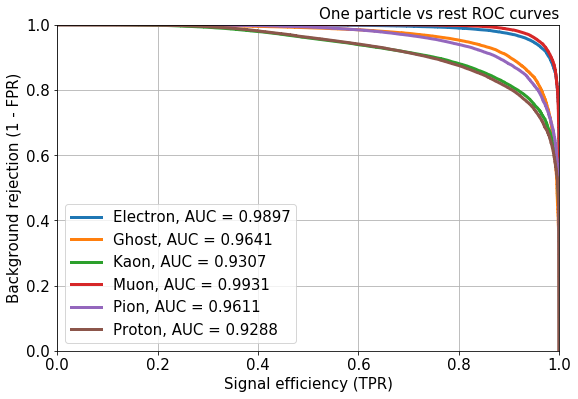

In [77]:
utils.plot_roc_curves(proba, validation_data.Class.values)

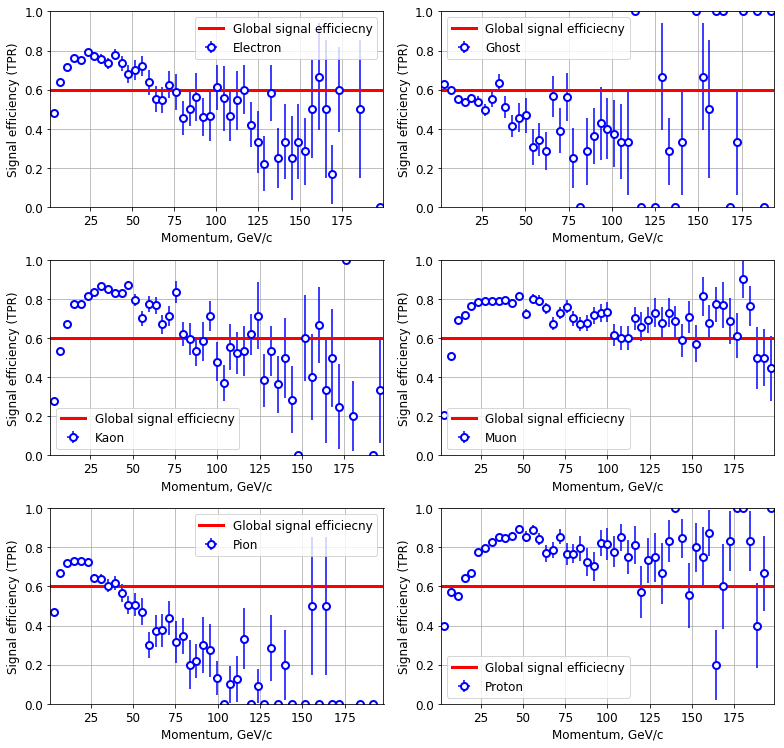

In [78]:
utils.plot_signal_efficiency_on_p(proba, validation_data.Class.values, validation_data.TrackP.values, 60, 50)
plt.show()

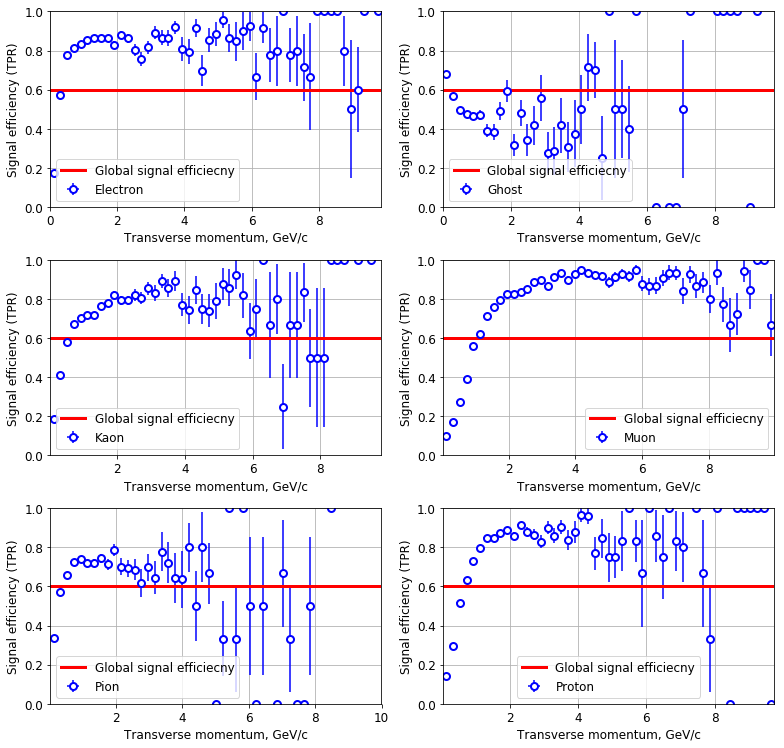

In [79]:
utils.plot_signal_efficiency_on_pt(proba, validation_data.Class.values, validation_data.TrackPt.values, 60, 50)
plt.show()

# Prepare submission

Select your best classifier and prepare submission file.

In [80]:
test = pandas.read_csv('test.csv.gz')

In [81]:
best_model = nn

In [83]:
# set test-scale
test_scale = scaler.transform(test[features])

In [86]:
# predict test sample
submit_proba = best_model.predict_proba(test_scale)
print(submit_proba)
submit_ids = test.ID

[[1.0996155e-05 3.3043852e-04 1.1238767e-02 3.0807260e-07 8.0123376e-05
  9.8833930e-01]
 [2.4343368e-03 1.6750491e-01 2.1837525e-01 3.5675207e-01 4.7126538e-03
  2.5022084e-01]
 [3.3970227e-04 1.3438994e-02 2.6767194e-01 2.9942847e-04 3.4352028e-01
  3.7472957e-01]
 ...
 [1.8156496e-03 9.7814494e-01 1.7619986e-03 5.4337108e-03 9.8755360e-03
  2.9681528e-03]
 [1.8693618e-03 3.0492110e-02 4.2717803e-01 4.1729347e-03 3.4140453e-02
  5.0214714e-01]
 [1.6925958e-04 7.1624373e-03 3.6279470e-01 2.3348845e-04 1.1232854e-03
  6.2851685e-01]]


In [85]:
from IPython.display import FileLink
utils.create_solution(submit_ids, submit_proba, filename='submission_file.csv.gz')

/Users/gleb/software/AdvancedMachineLearning/hadron-collider-machine-learning/week2/submission_file.csv.gz